# This is a Jupyter Notebook for the training and evaluation of a CNN model for Image Classification of the MNIST dataset inbuilt with Keras.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


In [3]:
#declare the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [4]:
#compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)

#evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", round(test_acc*100,2),"%")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8907 - loss: 0.3490 - val_accuracy: 0.9855 - val_loss: 0.0562
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0511 - val_accuracy: 0.9878 - val_loss: 0.0417
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9865 - val_loss: 0.0456
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9912 - val_loss: 0.0310
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 0.9912 - val_loss: 0.0316
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0355
Test accuracy: 99.02 %


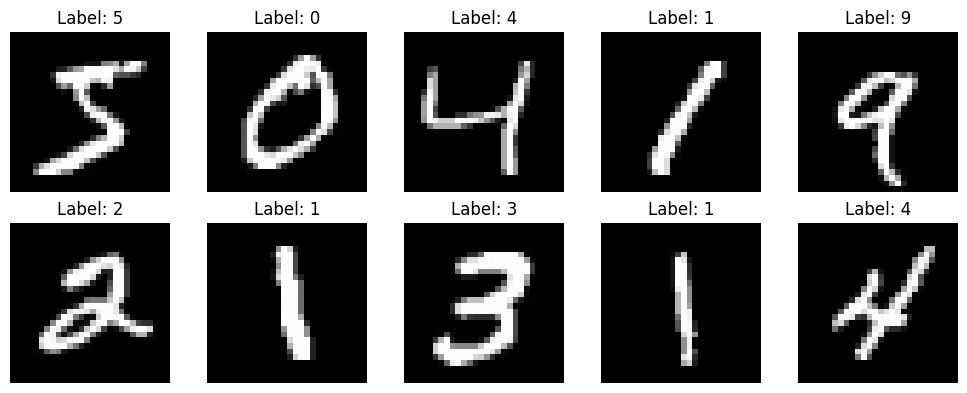

In [5]:
#some sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


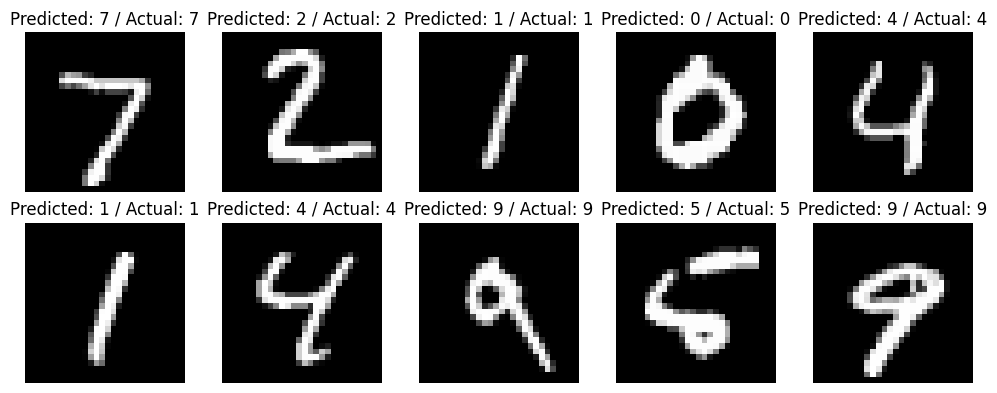

In [6]:
#sample predictions
predictions = model.predict(x_test[:10])
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    plt.title(f"Predicted: {pred_label} / Actual: {actual_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()